In [1]:
### basic libraries
import os
import itertools
from datetime import datetime
from json import dumps
import pandas as pd 
import numpy as np

### carto libraries
import shapefile ### not necessary ?
import geopandas as gp
#from shapely.geometry import Polygon
from shapely.geometry import shape

### for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
plt.rcParams["figure.figsize"] = (10.0, 10.0)
#plt.style.use("bmh")
plt.style.use("ggplot")

from app.scripts.topojson import topojson

from pyproj import Proj, transform ### not necessary ?

crs_lambert93 = 2154
crs_WSG84     = 4326
inCRS  = 'epsg:%s' %(crs_lambert93)
outCRS = 'epsg:%s' %(crs_WSG84)
inProj  = Proj(init=inCRS)  # proj in  : Lambert 93
outProj = Proj(init=outCRS) # proj out : WSG 84

### TO DO : find topojson libraries to reduce output file size


In [2]:
print (plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [3]:
### basic folders addresses and names
cwd = os.getcwd()

data_folder      = "app/static/data"
carto_folder     = "carto"
_web             = "_web"
carto_web_folder = carto_folder + _web

carto_path     = os.path.join(cwd, data_folder, carto_folder)
carto_web_path = os.path.join(cwd, data_folder, carto_web_folder)

print "-- cwd :"            , cwd
print "-- carto path     : ", carto_path
print "-- carto_web path : ", carto_web_path


-- cwd : /Users/jpy/Dropbox/_FLASK/concours_pesticides
-- carto path     :  /Users/jpy/Dropbox/_FLASK/concours_pesticides/app/static/data/carto
-- carto_web path :  /Users/jpy/Dropbox/_FLASK/concours_pesticides/app/static/data/carto_web


In [4]:
### basic pandas tools

idx = pd.IndexSlice

def checkDTypes (df) :
    # check data type
    
    for index in df.index.names :
        print "---- index : ", index

    for col in df.columns :
        #label = col.values
        dtype = df[col].dtype
        
        print "---- dtypes col : ", col, "/", dtype
        

In [5]:
# cf : https://pypi.python.org/pypi/pyshp
# cf : http://gis.stackexchange.com/questions/183795/how-do-i-select-shapefiles-to-be-converted-to-geojson-in-folder-with-multiple-sh
# cf : https://github.com/mlaloux/Python-geo_interface-applications/blob/master/PyShp_geointerface.py

# cf : https://glenbambrick.com/tag/pyshp/
# cf : https://glenbambrick.com/2016/01/24/reproject-shapefile/

In [6]:
### reading/writing - converting shp files to geojson
    
def geofile_path(filename, extension):
    path = os.path.join(carto_path , filename + extension )
    print "-- file path : ", path
    return path


In [7]:
### SHP and GEOJSON files 
_shp     = ".shp"
_json    = ".json"
_geojson = ".geojson"
_copy    = "_copy"

## .shp source for Masses d'eau
water_shp_fname    = "PolygMasseDEauSouterraine"

## add departements .geojson for other future datas than water (f.i. agriculture stats / src : Etalab)
# https://github.com/gregoiredavid/france-geojson

admin_regions      = "regions"
admin_regions_2015 = "regions_2015"
admin_departements = "departements"
admin_communes     = "communes"


In [8]:
### DEPRECATED : read .shp with shapefile
'''
def readSHP(filename):  
    # generator 
    reader = shapefile.Reader( root_carto_folder+ filename + _shp )  
    fields = reader.fields[1:]  
    field_names = [field[0] for field in fields]  
    for sr in reader.shapeRecords():  
        geom = sr.shape.__geo_interface__  
        atr = dict(zip(field_names, sr.record))  
        yield dict(geometry=geom,properties=atr)    
'''
'''
def readSHP(filename) :
    
    # read the shapefile
    reader = shapefile.Reader( geofile_path( water_shp_fname, _shp ) )
    fields = reader.fields[1:]
    field_names = [field[0] for field in fields]

    buffer = []
    for sr in reader.shapeRecords():
       atr = dict(zip(field_names, sr.record))
       geom = sr.shape.__geo_interface__
       buffer.append(dict(type="Feature", geometry=geom, properties=atr)) 

    # write the GeoJSON file (copy)
    geojson = open( os.path.join( carto_path, filename + _copy + _json), "w")
    geojson.write(dumps({"type": "FeatureCollection", "features": buffer}, indent=2) + "\n")
    geojson.close()
'''

print    

In [9]:
### options for gdf.read_file()
#import fiona; help(fiona.open)

### options for gdf.to_file()
#import fiona; fiona.supported_drivers

In [10]:
### read departements / regions geojson with geopandas

#gdf_dpts = gp.GeoDataFrame.from_file( geofile_path( admin_departements, _geojson ) )
gdf_dpts         = gp.read_file( geofile_path( admin_departements, _geojson ) )
gdf_regions      = gp.read_file( geofile_path( admin_regions, _geojson ) )
gdf_regions_2015 = gp.read_file( geofile_path( admin_regions_2015, _geojson ) )

print gdf_dpts.crs

# change projection crs (greedy)
# http://geopandas.org/projections.html

#gdf_dpts = gdf_dpts.to_crs(epsg=crs_WSG84)
#gdf_dpts = gdf_dpts.to_crs({'init': 'epsg:%s' %(crs_lambert93)} )
gdf_dpts         = gdf_dpts.to_crs(epsg=crs_lambert93)
gdf_regions      = gdf_regions.to_crs(epsg=crs_lambert93)
gdf_regions_2015 = gdf_regions_2015.to_crs(epsg=crs_lambert93)

print gdf_dpts.crs


-- file path :  /Users/jpy/Dropbox/_FLASK/concours_pesticides/app/static/data/carto/departements.geojson
-- file path :  /Users/jpy/Dropbox/_FLASK/concours_pesticides/app/static/data/carto/regions.geojson
-- file path :  /Users/jpy/Dropbox/_FLASK/concours_pesticides/app/static/data/carto/regions_2015.geojson
{'init': u'epsg:4326'}
{'init': 'epsg:2154', 'no_defs': True}


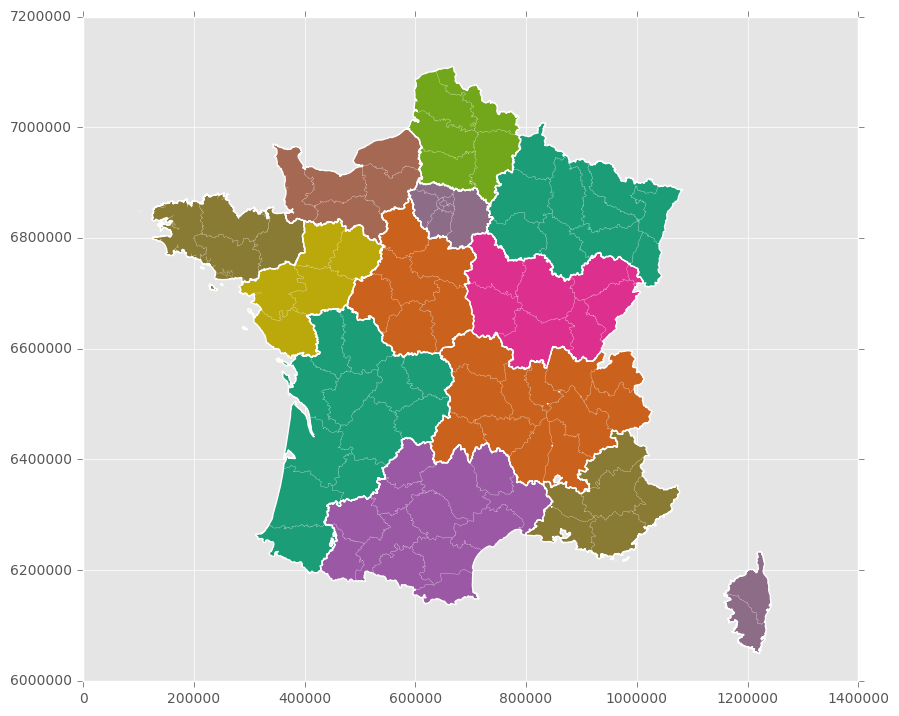

In [11]:
'''
Colormap White is not recognized. Possible values are: 
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, 
CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, 
Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, 
PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, 
RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, 
YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, 
binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, 
copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, 
gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, 
gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, 
hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, 
nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, 
rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, 
terrain, terrain_r, viridis, viridis_r, winter, winter_r
'''

cmaps = [('Perceptually Uniform Sequential',
                            ['viridis', 'inferno', 'plasma', 'magma']),
         ('Sequential',     ['Blues', 'BuGn', 'BuPu',
                             'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                             'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                             'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
         ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool',
                             'copper', 'gist_heat', 'gray', 'hot',
                             'pink', 'spring', 'summer', 'winter']),
         ('Diverging',      ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                             'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
                             'seismic']),
         ('Qualitative',    ['Accent', 'Dark2', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3']),
         ('Miscellaneous',  ['gist_earth', 'terrain', 'ocean', 'gist_stern',
                             'brg', 'CMRmap', 'cubehelix',
                             'gnuplot', 'gnuplot2', 'gist_ncar',
                             'nipy_spectral', 'jet', 'rainbow',
                             'gist_rainbow', 'hsv', 'flag', 'prism'])]


# cf : https://gist.github.com/jakevdp/91077b0cae40f8f8244a   
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


#plot_reg        = gdf_regions.plot(cmap=discrete_cmap(13, "Dark2"), alpha=1, edgecolor='White' )
plot_reg_2015   = gdf_regions_2015.plot(cmap=discrete_cmap(13, "Dark2"), alpha=1, edgecolor='White' )
plot_dpt        = gdf_dpts.plot(ax=plot_reg_2015, cmap=None, alpha=0, edgecolor='White', linewidth='0.1')


In [12]:

###########################################
###########################################
### CARTO MASSES D'EAU 
###########################################
###########################################


In [13]:
### read .shp waters with geopandas (greedy)

shp_encoding = "utf-8"   ### doesn't work
shp_encoding = "latin-1" ### not sure

crs_source = crs_lambert93
#crs_source = "lcc" ### not sure
## {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'WGS84','no_defs': True}


# read file
#gdf_waters = gp.read_file( geofile_path( water_shp_fname, _shp ), crs=crs_source, encoding=shp_encoding )
gdf_waters = gp.GeoDataFrame.from_file( geofile_path( water_shp_fname, _shp ) )

# set and sort index
gdf_waters.set_index(["CdBassinDC", "CdMasseDEa"], inplace=True)
gdf_waters.sortlevel(inplace=True) 

print "-- finish reading shp file"


-- file path :  /Users/jpy/Dropbox/_FLASK/concours_pesticides/app/static/data/carto/PolygMasseDEauSouterraine.shp


In [14]:
# check crs
gdf_waters.crs


{u'ellps': u'GRS80',
 u'lat_0': 46.5,
 u'lat_1': 49,
 u'lat_2': 44,
 u'lon_0': 3,
 u'no_defs': True,
 u'proj': u'lcc',
 u'units': u'm',
 u'x_0': 700000,
 u'y_0': 6600000}

In [15]:
def colToDate(df, list_col_names):
    # change to date format
    
    for col in list_col_names :
        df.loc[:, col] = pd.to_datetime( df.loc[:, col], infer_datetime_format=True)
    
    return df

# change date format
gdf_waters = colToDate( gdf_waters, ["DateCreati", "DateMajMas"] )


In [ ]:
# correct / debug unvalid geometries

def buffer_geom(row):
    
    geom     = row["geometry"]
    is_valid = geom.is_valid
    
    if is_valid == False :
        print "-- unvalid geom for CdEuMasseD : %s / CdPolygMas : %s " %(row["CdEuMasseD"], row["CdPolygMas"])
        geom = geom.buffer(0.0)
    else : 
        pass
    
    return geom

                                                                         
gdf_waters["geometry"] = gdf_waters.apply(buffer_geom, axis=1)

In [16]:
# return X,Y from centroid point

def getXY (centroidPoint):
    #print centroidPoint
    px = centroidPoint.x
    py = centroidPoint.y
    return (px, py)


In [66]:
gdf_waters["area"] = gdf_waters["geometry"].area

In [67]:
gdf_waters["centroid"] = gdf_waters["geometry"].centroid

In [68]:
gdf_waters["geom_valid"] = gdf_waters["geometry"].is_valid

In [69]:
gdf_waters.head()


CdEcoregio CdEuMasseD CdPolygMas Commentair DateCreati  \
CdBassinDC CdMasseDEa                                                          
A          AG001              13    FRAG001   00000002       None 2004-12-31   
           AG001              13    FRAG001   00000001       None 2004-12-31   
           AG002              13    FRAG002   00000003       None 2004-12-31   
           AG003              13    FRAG003   00000005       None 2004-12-31   
           AG003              13    FRAG003   00000004       None 2004-12-31   

                      DateMajMas FrangeLitt Karstique    LatMasseDE  \
CdBassinDC CdMasseDEa                                                 
A          AG001      2013-12-18          N         N  7.069081e+06   
           AG001      2013-12-18          N         N  7.069081e+06   
           AG002      2013-12-18          N         Y  7.072421e+06   
           AG003      2013-12-18          N         N  7.038903e+06   
           AG003      2013-12-18          N         N  7.038903e+06   

                          LonMasseDE  \
CdBassinDC CdMasseDEa                  
A          AG001       639573.042158   
           AG001       639573.042158   
           AG002       609585.385827   
           AG003       685405.450775   
           AG003       685405.450775   

                                          ...                      StMasseDEa  \
CdBassinDC CdMasseDEa                     ...                                   
A          AG001                          ...                         ValidÃ©   
           AG001                          ...                         ValidÃ©   
           AG002                          ...                         ValidÃ©   
           AG003                          ...                         ValidÃ©   
           AG003                          ...                         ValidÃ©   

                      SurfaceAff SurfaceSsC  SurfaceTot SystemeRef TypeMasseD  \
CdBassinDC CdMasseDEa                                                           
A          AG001           868.2       82.4       950.6         26         DS   
           AG001           868.2       82.4       950.6         26         DS   
           AG002           477.4        0.0       477.4         26         DS   
           AG003           742.4      587.5      1329.9         26         DS   
           AG003           742.4      587.5      1329.9         26         DS   

                                                                geometry  \
CdBassinDC CdMasseDEa                                                      
A          AG001       POLYGON ((651859.6700888127 7067573.305585384,...   
           AG001       (POLYGON ((617227.0852775276 7096815.711801797...   
           AG002       POLYGON ((617970.4125330001 7063544.312811732,...   
           AG003       (POLYGON ((719164.1102770045 7051492.354207844...   
           AG003       POLYGON ((704207.8221555278 7065745.600930788,...   

                               area  geom_valid  \
CdBassinDC CdMasseDEa                             
A          AG001       8.237526e+07        True   
           AG001       8.681770e+08        True   
           AG002       4.774317e+08        True   
           AG003       5.875281e+08        True   
           AG003       7.423879e+08        True   

                                                          centroid  
CdBassinDC CdMasseDEa                                               
A          AG001       POINT (633559.5781241878 7082551.460281919)  
           AG001       POINT (628581.5922041651 7071783.175484098)  
           AG002        POINT (609585.385826876 7072421.478528101)  
           AG003        POINT (699674.7046627261 7059620.14203725)  
           AG003       POINT (695989.6679314554 7046109.812009562)  

[5 rows x 27 columns]

In [70]:
not_valid_geoms = gdf_waters.loc[ gdf_waters["geom_valid"] == False ]
print not_valid_geoms.shape
not_valid_geoms.head(3)
#not_valid_geoms.plot()

(0, 27)


,,CdEcoregio,CdEuMasseD,CdPolygMas,Commentair,DateCreati,DateMajMas,FrangeLitt,Karstique,LatMasseDE,LonMasseDE,...,StMasseDEa,SurfaceAff,SurfaceSsC,SurfaceTot,SystemeRef,TypeMasseD,geometry,area,geom_valid,centroid
CdBassinDC,CdMasseDEa,,,,,,,,,,,,,,,,,,,,,


Ring Self-intersection at or near point 826425.25400499254 6962164.8597894236


CdBassinDC  CdMasseDEa
B1          B1G018        False
dtype: bool


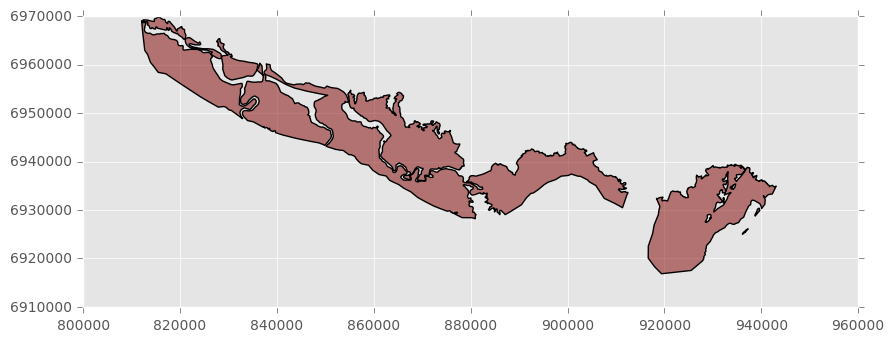

In [63]:
notvalid_a  = gdf_waters.loc[ idx[:, "B1G018"], :].copy()
notvalid_b = notvalid_a.loc[ notvalid_a["geom_valid"] == False ]
notvalid_b.plot()
#notvalid_b["geometry"] = notvalid_b["geometry"].buffer(0.0)
print notvalid_b["geometry"].is_valid

In [72]:
print gdf_waters.shape

(1103, 27)


In [73]:
checkDTypes(gdf_waters) 


---- index :  CdBassinDC
---- index :  CdMasseDEa
---- dtypes col :  CdEcoregio / object
---- dtypes col :  CdEuMasseD / object
---- dtypes col :  CdPolygMas / object
---- dtypes col :  Commentair / object
---- dtypes col :  DateCreati / datetime64[ns]
---- dtypes col :  DateMajMas / datetime64[ns]
---- dtypes col :  FrangeLitt / object
---- dtypes col :  Karstique / object
---- dtypes col :  LatMasseDE / float64
---- dtypes col :  LonMasseDE / float64
---- dtypes col :  MasseDEauA / object
---- dtypes col :  MasseDEauT / object
---- dtypes col :  NatureEcou / object
---- dtypes col :  Niveau / int64
---- dtypes col :  NomMasseDE / object
---- dtypes col :  PrecSupMas / object
---- dtypes col :  Regroupees / object
---- dtypes col :  StMasseDEa / object
---- dtypes col :  SurfaceAff / float64
---- dtypes col :  SurfaceSsC / float64
---- dtypes col :  SurfaceTot / float64
---- dtypes col :  SystemeRef / object
---- dtypes col :  TypeMasseD / object
---- dtypes col :  geometry / object
-

In [74]:
#print list(gdf_waters.index.get_level_values("CdBassinDC").unique())

In [75]:
#print list(gdf_waters.index.get_level_values("CdMasseDEa").unique())[:20], "..."

In [76]:
#print list(gdf_waters.columns.values)

In [77]:
#gdf_waters.index

MultiIndex(levels=[[u'A', u'B1', u'B2', u'C', u'D', u'E', u'F', u'G', u'H'], [u'AG001', u'AG002', u'AG003', u'AG004', u'AG005', u'AG006', u'AG007', u'AG008', u'AG009', u'AG010', u'AG011', u'AG012', u'AG013', u'AG014', u'AG015', u'AG018', u'B1G007', u'B1G009', u'B1G011', u'B1G013', u'B1G015', u'B1G018', u'B1G019', u'B1G020', u'B1G021', u'B1G023', u'B1G025', u'B2G016', u'B2G017', u'CG001', u'CG002', u'CG003', u'CG004', u'CG005', u'CG006', u'CG008', u'CG010', u'CG016', u'CG017', u'CG022', u'CG024', u'CG026', u'CG027', u'CG028', u'DG101', u'DG102', u'DG104', u'DG105', u'DG106', u'DG107', u'DG108', u'DG109', u'DG110', u'DG111', u'DG112', u'DG113', u'DG115', u'DG117', u'DG118', u'DG123', u'DG125', u'DG126', u'DG127', u'DG128', u'DG130', u'DG132', u'DG133', u'DG139', u'DG140', u'DG144', u'DG145', u'DG146', u'DG147', u'DG148', u'DG149', u'DG150', u'DG151', u'DG152', u'DG153', u'DG154', u'DG155', u'DG156', u'DG157', u'DG158', u'DG159', u'DG160', u'DG161', u'DG162', u'DG163', u'DG164', u'DG165',

In [78]:
### list of unique values MdE_cd for index "CdMasseDEa"

Bassins_cd_dict = {"lev_index" : 1, "cd_list" : list( gdf_waters.index.get_level_values("CdBassinDC").unique() ) }
MdEs_cd_dict    = {"lev_index" : 2, "cd_list" : list( gdf_waters.index.get_level_values("CdMasseDEa").unique() ) }

print "lev_index : %s - cd_list : %s" %(Bassins_cd_dict["lev_index"]     , Bassins_cd_dict["cd_list"])
print "lev_index : %s - cd_list : ... %s ..." %(MdEs_cd_dict["lev_index"], MdEs_cd_dict["cd_list"][-20:])
print 

### dictionnaries sublevels
Bassins_ME_dict = {}
for bassin in Bassins_cd_dict["cd_list"] :
    sub_ME = [ ME for ME in MdEs_cd_dict["cd_list"] if ( ME.startswith(bassin) ) ]
    Bassins_ME_dict[bassin] = sub_ME
    print " %s : count %s ME" %(bassin, len(sub_ME) )

print

test_uplevel = "C"
print " Bassins_ME_dict['%s'] : " %(test_uplevel), Bassins_ME_dict[test_uplevel]
print 

### reverse Bassins_ME_dict
ME_Bassins_dict ={}
for bassin, ME_list in Bassins_ME_dict.iteritems():
    for ME in ME_list :
        ME_Bassins_dict[ME] = bassin
    
test_sublevel = "AG001"
print " ME_Bassins_dict['%s'] : " %(test_sublevel), ME_Bassins_dict[test_sublevel]


lev_index : 1 - cd_list : [u'A', u'B1', u'B2', u'C', u'D', u'E', u'F', u'G', u'H']
lev_index : 2 - cd_list : ... [u'HG301', u'HG302', u'HG303', u'HG304', u'HG305', u'HG306', u'HG307', u'HG308', u'HG309', u'HG310', u'HG401', u'HG402', u'HG501', u'HG502', u'HG503', u'HG504', u'HG505', u'HG506', u'HG507', u'HG508'] ...

 A : count 16 ME
 B1 : count 11 ME
 B2 : count 2 ME
 C : count 15 ME
 D : count 239 ME
 E : count 15 ME
 F : count 105 ME
 G : count 143 ME
 H : count 53 ME

 Bassins_ME_dict['C'] :  [u'CG001', u'CG002', u'CG003', u'CG004', u'CG005', u'CG006', u'CG008', u'CG010', u'CG016', u'CG017', u'CG022', u'CG024', u'CG026', u'CG027', u'CG028']

 ME_Bassins_dict['AG001'] :  A


In [79]:
"""
### cf : http://www.sandre.eaufrance.fr/urn.php?urn=urn:sandre:dictionnaire:MDO::entite:MasseDEau:ressource:latest:::html
Le code de la masse d'eau est structuré de la manière suivante :
Code du bassin (district au sens de la dce) + 
Code du type (
    "R" pour rivière, 
    "L" pour plan d'eau, 
    "T" pour transition, 
    "C" pour cotière, 
    "G" pour masse d'eau souterraine) 
    + Incrément.
    

"""
print 

In [80]:
### test loc

gdf_waters.loc[ idx[ "A", : ], "MasseDEauA": ].head()
#gdf_waters.loc[ idx[ "A", : ], "MasseDEauA":"TypeMasseD" ].head()

MasseDEauA MasseDEauT NatureEcou  Niveau  \
CdBassinDC CdMasseDEa                                            
A          AG001               N          N          3       2   
           AG001               N          N          3       1   
           AG002               N          N          3       1   
           AG003               Y          N          3       2   
           AG003               Y          N          3       1   

                                             NomMasseDE PrecSupMas Regroupees  \
CdBassinDC CdMasseDEa                                                           
A          AG001                Craie de lâAudomarois          1          N   
           AG001                Craie de lâAudomarois          1          N   
           AG002                Calcaires du Boulonnais          2          Y   
           AG003       Craie de la vallÃ©e de la DeÃ»le          1          N   
           AG003       Craie de la vallÃ©e de la DeÃ»le          1          N   

                      StMasseDEa  SurfaceAff  SurfaceSsC  SurfaceTot  \
CdBassinDC CdMasseDEa                                                  
A          AG001         ValidÃ©       868.2        82.4       950.6   
           AG001         ValidÃ©       868.2        82.4       950.6   
           AG002         ValidÃ©       477.4         0.0       477.4   
           AG003         ValidÃ©       742.4       587.5      1329.9   
           AG003         ValidÃ©       742.4       587.5      1329.9   

                      SystemeRef TypeMasseD  \
CdBassinDC CdMasseDEa                         
A          AG001              26         DS   
           AG001              26         DS   
           AG002              26         DS   
           AG003              26         DS   
           AG003              26         DS   

                                                                geometry  \
CdBassinDC CdMasseDEa                                                      
A          AG001       POLYGON ((651859.6700888127 7067573.305585384,...   
           AG001       (POLYGON ((617227.0852775276 7096815.711801797...   
           AG002       POLYGON ((617970.4125330001 7063544.312811732,...   
           AG003       (POLYGON ((719164.1102770045 7051492.354207844...   
           AG003       POLYGON ((704207.8221555278 7065745.600930788,...   

                               area geom_valid  \
CdBassinDC CdMasseDEa                            
A          AG001       8.237526e+07       True   
           AG001       8.681770e+08       True   
           AG002       4.774317e+08       True   
           AG003       5.875281e+08       True   
           AG003       7.423879e+08       True   

                                                          centroid  
CdBassinDC CdMasseDEa                                               
A          AG001       POINT (633559.5781241878 7082551.460281919)  
           AG001       POINT (628581.5922041651 7071783.175484098)  
           AG002        POINT (609585.385826876 7072421.478528101)  
           AG003        POINT (699674.7046627261 7059620.14203725)  
           AG003       POINT (695989.6679314554 7046109.812009562)

In [81]:
### test if NaN in CdMasseDEa

for cd in list(gdf_waters.index.get_level_values("CdMasseDEa").unique()) :
    if len(cd)<5 :
        print cd

In [82]:
#gdf_waters.info(memory_usage="deep")

In [83]:
#gdf_waters.memory_usage().sum()

In [84]:
## test loc on geometry

test_geom = gdf_waters.loc["A","AG001"]["geometry"]
print test_geom


CdBassinDC  CdMasseDEa
A           AG001         POLYGON ((651859.6700888127 7067573.305585384,...
            AG001         (POLYGON ((617227.0852775276 7096815.711801797...
Name: geometry, dtype: object


In [85]:
### test loc slice 2 dimensions

gdf_waters.head(50).loc[ idx[:,"AG001"], idx["MasseDEauA":]]


MasseDEauA MasseDEauT NatureEcou  Niveau  \
CdBassinDC CdMasseDEa                                            
A          AG001               N          N          3       2   
           AG001               N          N          3       1   

                                    NomMasseDE PrecSupMas Regroupees  \
CdBassinDC CdMasseDEa                                                  
A          AG001       Craie de lâAudomarois          1          N   
           AG001       Craie de lâAudomarois          1          N   

                      StMasseDEa  SurfaceAff  SurfaceSsC  SurfaceTot  \
CdBassinDC CdMasseDEa                                                  
A          AG001         ValidÃ©       868.2        82.4       950.6   
           AG001         ValidÃ©       868.2        82.4       950.6   

                      SystemeRef TypeMasseD  \
CdBassinDC CdMasseDEa                         
A          AG001              26         DS   
           AG001              26         DS   

                                                                geometry  \
CdBassinDC CdMasseDEa                                                      
A          AG001       POLYGON ((651859.6700888127 7067573.305585384,...   
           AG001       (POLYGON ((617227.0852775276 7096815.711801797...   

                               area geom_valid  \
CdBassinDC CdMasseDEa                            
A          AG001       8.237526e+07       True   
           AG001       8.681770e+08       True   

                                                          centroid  
CdBassinDC CdMasseDEa                                               
A          AG001       POINT (633559.5781241878 7082551.460281919)  
           AG001       POINT (628581.5922041651 7071783.175484098)

In [86]:
### set test slice
idx = pd.IndexSlice

level_1   = "G"
level_2   = "AG001"

slice_gdf_lev1 = idx[ level_1 , : ]
slice_gdf_lev2 = idx[ : , level_2 ]


In [87]:

gdf_waters.loc[ slice_gdf_lev1 , : ]["geometry"]

#print slice_gdf

CdBassinDC  CdMasseDEa
G           GG001         (POLYGON ((119779.0000019297 6834994.000001919...
            GG002         (POLYGON ((115029.0000019148 6800338.000001922...
            GG003         POLYGON ((161140.2389198318 6795183.135010835,...
            GG004         POLYGON ((200425.8276800886 6804037.147595119,...
            GG005         (POLYGON ((176022.0000019148 6757430.000001915...
            GG006         POLYGON ((232590.8368711472 6801414.030846406,...
            GG007         POLYGON ((207509.0907517895 6841437.785549302,...
            GG008         POLYGON ((211550.3199057877 6864577.97298919, ...
            GG009         (POLYGON ((255458.9904232025 6875250.890668876...
            GG010         POLYGON ((254260.1615496054 6826077.576658629,...
            GG011         (POLYGON ((212851.0776005387 6748220.585497923...
            GG012         (POLYGON ((257749.0001220852 6710720.000122081...
            GG013         POLYGON ((316609.4353112206 6844226.470

In [ ]:
### test slice + simplify

#gdf.head(10).plot()
#gdf.loc["A", "AG015"]["geometry"].simplify(200, preserve_topology=False).plot()
#gdf.loc["B1"]["geometry"].simplify(500, preserve_topology=False).plot()
#gdf.loc["A":"B1"]["geometry"].simplify(700, preserve_topology=False).plot()
gdf_waters.loc[ slice_gdf_lev1, : ]["geometry"].simplify(600, preserve_topology=True).plot(edgecolor='none')


In [ ]:
# test extract and copy for union

copied_slice = gdf_waters.loc[ slice_gdf_lev1, : ].copy()

#gdf_waters_test_union = gp.GeoDataFrame( data=gdf_waters.loc["A","AG001"].head(1), index=gdf_waters.index, columns=gdf_waters.columns)
gdf_waters_test_union = gp.GeoDataFrame( data=copied_slice, index=None, columns=gdf_waters.columns)
gdf_waters_test_union.plot(edgecolor='White', alpha=0.5)

#gdf_waters_test_union.index

# labels on plot
for idx, row in gdf_waters_test_union.iterrows():
    plt.annotate(s=idx[1],
                 xy=getXY(row['centroid']),
                 horizontalalignment='center')

print

In [ ]:
copied_slice = gdf_waters.loc[ slice_gdf_lev1, : ].copy()
#copied_slice.tail()
copied_slice.iloc[0]

In [221]:
## test tuples by CD_ME ou CD_BASSIN

print "lev_index : %s - cd_list (len %s ) : %s" %(Bassins_cd_dict["lev_index"], len(Bassins_cd_dict["cd_list"]), Bassins_cd_dict["cd_list"])
print "lev_index : %s - cd_list (len %s ) : ... %s ..." %(MdEs_cd_dict["lev_index"], len(MdEs_cd_dict["cd_list"]), MdEs_cd_dict["cd_list"][-20:])
print

tuples_allBassins = []
_all = "XXXXX"

for bassin in Bassins_cd_dict["cd_list"] : 
    tuple_bassin = ( bassin, bassin + _all )
    tuples_allBassins.append(tuple_bassin)
    
print tuples_allBassins


lev_index : 1 - cd_list (len 9 ) : [u'A', u'B1', u'B2', u'C', u'D', u'E', u'F', u'G', u'H']
lev_index : 2 - cd_list (len 599 ) : ... [u'HG301', u'HG302', u'HG303', u'HG304', u'HG305', u'HG306', u'HG307', u'HG308', u'HG309', u'HG310', u'HG401', u'HG402', u'HG501', u'HG502', u'HG503', u'HG504', u'HG505', u'HG506', u'HG507', u'HG508'] ...

[(u'A', u'AXXXXX'), (u'B1', u'B1XXXXX'), (u'B2', u'B2XXXXX'), (u'C', u'CXXXXX'), (u'D', u'DXXXXX'), (u'E', u'EXXXXX'), (u'F', u'FXXXXX'), (u'G', u'GXXXXX'), (u'H', u'HXXXXX')]


In [217]:

#################################
### SIMPLIFY BY UNION 
#################################


### set test slice
idx = pd.IndexSlice


### unary_union function

def Union_GDF( gdf_in, level_index ):
    
    start_time = datetime.now()
    
    print ">>>>> START Union_GDF at time : %s >>>>>" %(start_time)
        
    tuples  = []
    
    if level_index == 1 :
        cd_list = Bassins_cd_dict["cd_list"]
        _all    = "XXXXX"
        
        for bassin in cd_list : 
            tuple_bassin = ( bassin, bassin + _all )
            tuples.append(tuple_bassin)
                
    elif level_index == 2 :
        cd_list = MdEs_cd_dict["cd_list"]
        
        for ME in cd_list : 
            tuple_ME = ( ME_Bassins_dict[ME], ME + _all ) 
            tuples.append(tuple_ME)
    
    #print tuples
        
    ### set empty geodataframe
    index_union = pd.MultiIndex.from_tuples(tuples, names=['CdBassinDC', 'CdMasseDEa'])
    gdf_union   = gp.GeoDataFrame( data=None, index=index_union, columns=gdf_in.columns)
    
    lap_start = datetime.now()
    
    ### iterate through levels of flattening
    for i, cd in enumerate(cd_list) : 
                
        print "-- start  flatenning level %s " %(cd)
        
        if level_index == 1 :
            idx_slice = idx[ cd, : ]
        elif level_index == 2 :
            idx_slice = idx[ : , cd]
        
        copied_slice         = gdf_in.loc[ idx_slice , : ].copy()
        geoms_slice          = copied_slice["geometry"].copy()
        geoms_slice_union    = geoms_slice.unary_union
        geoms_union_centroid = geoms_slice_union.centroid
        
        ### copy first row of corresponding level & change geom to geoms_slice_union + recompute centroid
        gdf_union.iloc[i]             = copied_slice.iloc[0]
        gdf_union.iloc[i]["geometry"] = geoms_slice_union
        gdf_union.iloc[i]["centroid"] = geoms_union_centroid

        lap_finish = datetime.now() - lap_start
        print "-- finish flatenning level %s / lap_finish : %s " %(cd, lap_finish)
        lap_start = datetime.now()
    
    
    delta_time = datetime.now() - start_time
    print ">>>>> FINISH Union_GDF at delta_time : %s >>>>>" %(delta_time)

    return gdf_union


#### flatten by bassins
gdf_union_bassins = Union_GDF( gdf_waters, level_index=1 )
gdf_union_bassins.plot(edgecolor='White', alpha=0.5)

#### flatten by ME
#gdf_union_ME = Union_GDF( gdf_waters, level_index=2 )


for idx, row in gdf_test_union.iterrows():
    plt.annotate(s=idx[1],
                 xy=getXY(row['centroid']),
                 horizontalalignment='center')
    


>>>>> START Union_GDF at time : 2016-12-29 21:04:34.243328 >>>>>
-- start  flatenning level A 
-- finish flatenning level A / lap_finish : 0:00:01.537560 
-- start  flatenning level B1 
-- finish flatenning level B1 / lap_finish : 0:00:03.453943 
-- start  flatenning level B2 
-- finish flatenning level B2 / lap_finish : 0:00:00.116087 
-- start  flatenning level C 
-- finish flatenning level C / lap_finish : 0:00:04.492590 
-- start  flatenning level D 
-- finish flatenning level D / lap_finish : 0:02:41.669790 
-- start  flatenning level E 
-- finish flatenning level E / lap_finish : 0:00:06.080554 
-- start  flatenning level F 
-- finish flatenning level F / lap_finish : 0:00:55.988768 
-- start  flatenning level G 


TopologyException: Input geom 0 is invalid: Ring Self-intersection at or near point 533847.38685119897 6616519.0138354599 at 533847.38685119897 6616519.0138354599


ValueError: No Shapely geometry can be created from null value

,,CdEcoregio,CdEuMasseD,CdPolygMas,Commentair,DateCreati,DateMajMas,FrangeLitt,Karstique,LatMasseDE,LonMasseDE,...,Regroupees,StMasseDEa,SurfaceAff,SurfaceSsC,SurfaceTot,SystemeRef,TypeMasseD,geometry,area,centroid
CdBassinDC,CdMasseDEa,,,,,,,,,,,,,,,,,,,,,
A,AXXXX,13,FRAG001,00000002,None,2004-12-31 00:00:00,2013-12-18 00:00:00,N,N,7.06908e+06,639573,...,N,ValidÃ©,868.2,82.4,950.6,26,DS,"POLYGON ((744438.6229160428 7000964.664755709,...",8.23753e+07,POINT (666206.6696905004 7019944.150899272)


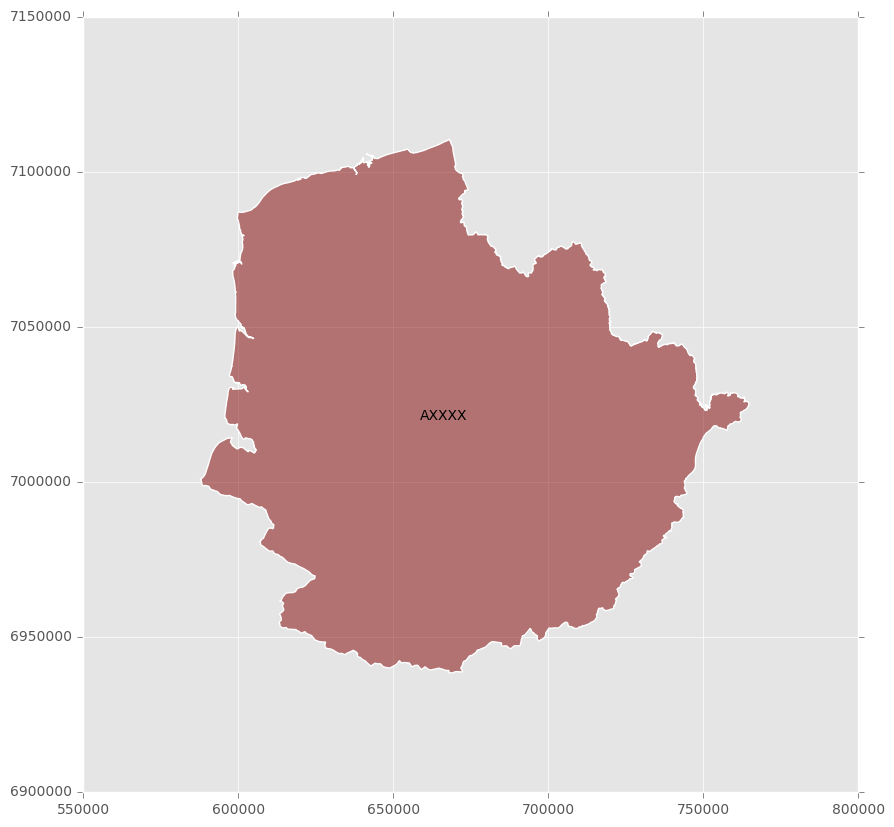

In [185]:
### test union 

#copied_slice = gdf_waters.loc[ slice_gdf, : ].copy()

geoms_slice       = copied_slice["geometry"].copy()
geoms_slice_union = geoms_slice.unary_union
geoms_slice_union_centroid = geoms_slice_union.centroid

### create geodataframe dummy
tuples = [(level_1, "AXXXX")]
index_union = pd.MultiIndex.from_tuples(tuples, names=['CdBassinDC', 'CdMasseDEa'])
gdf_test_union             = gp.GeoDataFrame( data=None, index=index_union, columns=copied_slice.columns)

### copy first row of corresponding level
gdf_test_union.iloc[0]             = copied_slice.iloc[0]
gdf_test_union.iloc[0]["geometry"] = geoms_slice_union
gdf_test_union.iloc[0]["centroid"] = geoms_slice_union_centroid

gdf_test_union.plot(edgecolor='White', alpha=0.5)

for idx, row in gdf_test_union.iterrows():
    plt.annotate(s=idx[1],
                 xy=getXY(row['centroid']),
                 horizontalalignment='center')

gdf_test_union.head()

#test_union = gdf_waters_test_union.loc[ slice_gdf, : ]["geometry"].unary_union
#test_union#.plot()

#gdf_waters_test_union.loc[ slice_gdf, : ]["geometry"] = test_union
#gdf_waters_test_union.plot()

#gdf_waters_test_union

In [28]:
gdf_waters.head()


CdEcoregio CdEuMasseD CdPolygMas Commentair DateCreati  \
CdBassinDC CdMasseDEa                                                          
A          AG001              13    FRAG001   00000002       None 2004-12-31   
           AG001              13    FRAG001   00000001       None 2004-12-31   
           AG002              13    FRAG002   00000003       None 2004-12-31   
           AG003              13    FRAG003   00000005       None 2004-12-31   
           AG003              13    FRAG003   00000004       None 2004-12-31   

                      DateMajMas FrangeLitt Karstique    LatMasseDE  \
CdBassinDC CdMasseDEa                                                 
A          AG001      2013-12-18          N         N  7.069081e+06   
           AG001      2013-12-18          N         N  7.069081e+06   
           AG002      2013-12-18          N         Y  7.072421e+06   
           AG003      2013-12-18          N         N  7.038903e+06   
           AG003      2013-12-18          N         N  7.038903e+06   

                          LonMasseDE      ...      PrecSupMas Regroupees  \
CdBassinDC CdMasseDEa                     ...                              
A          AG001       639573.042158      ...               1          N   
           AG001       639573.042158      ...               1          N   
           AG002       609585.385827      ...               2          Y   
           AG003       685405.450775      ...               1          N   
           AG003       685405.450775      ...               1          N   

                      StMasseDEa  SurfaceAff SurfaceSsC SurfaceTot SystemeRef  \
CdBassinDC CdMasseDEa                                                           
A          AG001         ValidÃ©       868.2       82.4      950.6         26   
           AG001         ValidÃ©       868.2       82.4      950.6         26   
           AG002         ValidÃ©       477.4        0.0      477.4         26   
           AG003         ValidÃ©       742.4      587.5     1329.9         26   
           AG003         ValidÃ©       742.4      587.5     1329.9         26   

                      TypeMasseD  \
CdBassinDC CdMasseDEa              
A          AG001              DS   
           AG001              DS   
           AG002              DS   
           AG003              DS   
           AG003              DS   

                                                                geometry  \
CdBassinDC CdMasseDEa                                                      
A          AG001       POLYGON ((651859.6700888127 7067573.305585384,...   
           AG001       (POLYGON ((617227.0852775276 7096815.711801797...   
           AG002       POLYGON ((617970.4125330001 7063544.312811732,...   
           AG003       (POLYGON ((719164.1102770045 7051492.354207844...   
           AG003       POLYGON ((704207.8221555278 7065745.600930788,...   

                               area  
CdBassinDC CdMasseDEa                
A          AG001       8.237526e+07  
           AG001       8.681770e+08  
           AG002       4.774317e+08  
           AG003       5.875281e+08  
           AG003       7.423879e+08  

[5 rows x 25 columns]

In [30]:
#for pg in gdf_waters.loc["H","HG210"]["geometry"]:
#    print pg


In [31]:
gdf_waters.info(memory_usage="deep")

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1103 entries, (A, AG001) to (H, HG508)
Data columns (total 25 columns):
CdEcoregio    1103 non-null object
CdEuMasseD    1103 non-null object
CdPolygMas    1103 non-null object
Commentair    551 non-null object
DateCreati    1103 non-null datetime64[ns]
DateMajMas    1103 non-null datetime64[ns]
FrangeLitt    1103 non-null object
Karstique     1103 non-null object
LatMasseDE    1103 non-null float64
LonMasseDE    1103 non-null float64
MasseDEauA    1103 non-null object
MasseDEauT    1103 non-null object
NatureEcou    1103 non-null object
Niveau        1103 non-null int64
NomMasseDE    1103 non-null object
PrecSupMas    1103 non-null object
Regroupees    1103 non-null object
StMasseDEa    1103 non-null object
SurfaceAff    1103 non-null float64
SurfaceSsC    1103 non-null float64
SurfaceTot    1103 non-null float64
SystemeRef    1103 non-null object
TypeMasseD    1103 non-null object
geometry      1103 non-null object
area       

In [32]:

#############################################
### REDUCE SIZE GEOJSON : 3 steps
###    - 1) simplify geoms for all features
###    - 2) union MdE by MdE/CdMasseDEa
###    - 3) convert to TOPOJSON / GEOJSON
#############################################


In [105]:
### list index values / CdBassinDC + CdMasseDEa

#original_index   = gdf.index
#original_columns = gdf.columns

### empty geoDataframes for flattened levels
#gdf_bassins_2D = gp.GeoDataFrame(data=None, index=gdf_waters.index , columns=gdf_waters.columns)
gdf_bassins_2D = gp.GeoDataFrame(data=None, index=None , columns=gdf_waters.columns)
#gdf_MdEs_2D    = gp.GeoDataFrame(data=None, index=gdf_waters.index , columns=gdf_waters.columns)
gdf_MdEs_2D    = gp.GeoDataFrame(data=None, index=None , columns=gdf_waters.columns)



lev_index : 1 - cd_list : [u'A', u'B1', u'B2', u'C', u'D', u'E', u'F', u'G', u'H']
lev_index : 2 - cd_list : [u'AG001', u'AG002', u'AG003', u'AG004', u'AG005', u'AG006', u'AG007', u'AG008', u'AG009', u'AG010']


In [33]:
# copy original gdf 

gdf_waters_reduced = gdf_waters.copy()
#gdf_waters_reduced.head()

In [34]:
### determine tolerance depending on area (linear function y = ax + b)

area_min = gdf_waters["area"].min()
area_max = gdf_waters["area"].max()

tol_min = 5
tol_max = 500

print "area min : ", area_min
print "area max : ", area_max

def linear_tolerance(area):
    a = (tol_max - tol_min) / ( area_max - area_min)
    b = tol_min - ( a * area_min )
    tolerance = ( a * area ) + b
    return tolerance

print linear_tolerance(6000)

area min :  5786.56659817
area max :  53233754762.9
5.00000198463


In [35]:
### SIMPLIFY (1) test a : simplify geometries by ratio (tolerance)

def simplify_geom(row):
    
    geom = row["geometry"]
    area = row["area"]
    
    ### put a while loop here for test if simplified shape is plottable
    
    geom_simplified = geom.simplify( linear_tolerance(area), preserve_topology=False )
    
    return geom_simplified

#gdf_waters_reduced["geometry"] = gdf_waters.apply(simplify_geom, axis=1)


In [ ]:
### SIMPLIFY (1) test a : simplify geometries by ratio (tolerance)

for 

In [ ]:
#gdf_waters_reduced.loc[ idx["E":"F"] , ["geometry"] ].plot()


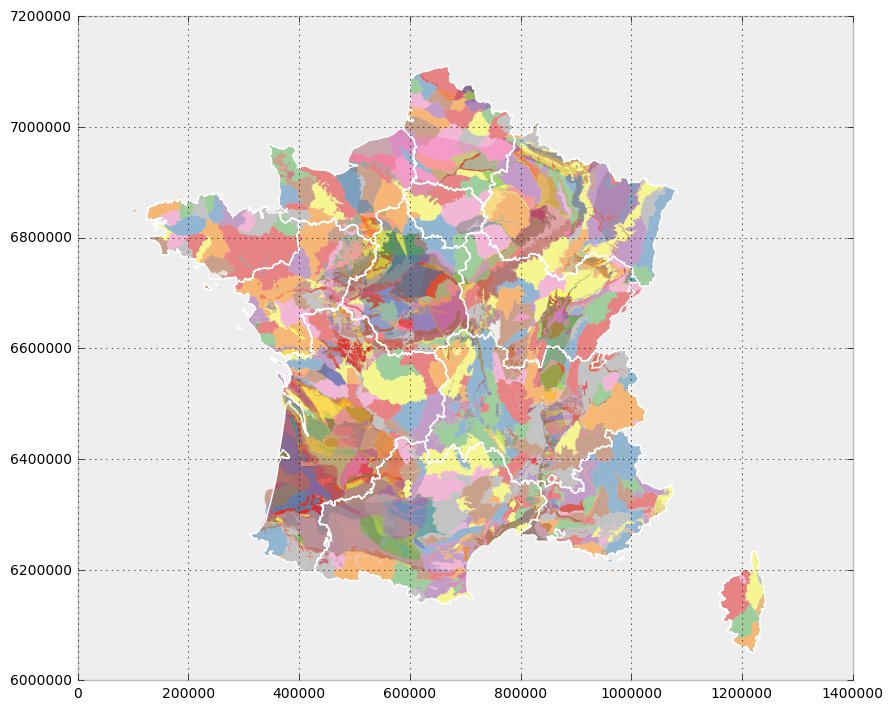

In [46]:
plot_waters = gdf_waters_reduced["geometry"].plot( edgecolor='none' ) #, linewidth='0.1' )
print "-- plot_waters finished ..."

#plot_dpt = gdf_dpts.plot( ax=waters_plot, cmap=None, alpha=0, edgecolor='White', linewidth='0.1')
plot_water_reg_2015 = gdf_regions_2015.plot( ax=plot_waters, cmap=None, alpha=0, edgecolor='White', linewidth='1')


In [47]:
plot_water_dpt = gdf_dpts.plot( ax=plot_waters, cmap=None, alpha=0, edgecolor='White', linewidth='1')


In [50]:
plot_water_dpt

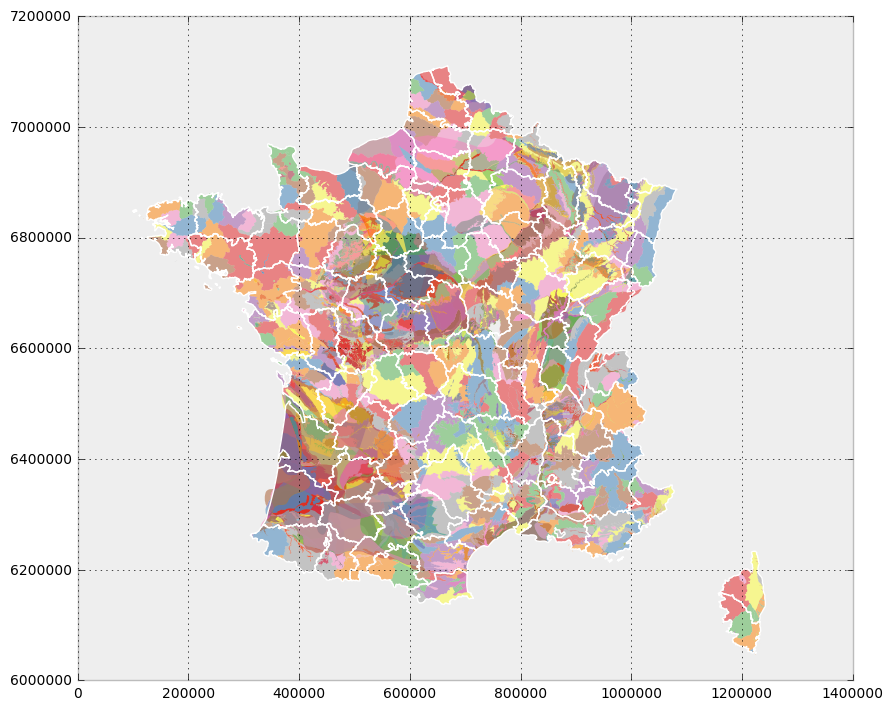

In [48]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
gdf_waters_reduced["geometry"].plot( ax=ax, edgecolor='none')
gdf_dpts.plot( ax=ax, cmap=None, alpha=0, edgecolor='White', linewidth='1')
plt.show()

In [49]:
plt.show()

In [36]:
### determine tolerance depending on area (Bezier curve)
### cf : http://stackoverflow.com/questions/246525/how-can-i-draw-a-bezier-curve-using-pythons-pil 


P1 = (area_min, tol_min)
K1 = (area_max, tol_min)
P2 = (area_max, tol_max)
K2 = (area_min, tol_max)

sequence = [ P1, K1, P2, K2 ]

'''
import mathutils
from mathutils.geometry import interpolate_bezier
import mathutils.Vector as vec

print interpolate_bezier( vec(P1), vec(K1), vec(K2), vec(P2) )



def make_bezier(xys):
    # xys should be a sequence of 2-tuples (Bezier control points)
    n = len(xys)
    
    combinations = pascal_row(n-1)
    ### if only quadratic curve use :
    #combination = (1,3,3,1)
    
    def bezier(ts):
        # This uses the generalized formula for bezier curves
        # http://en.wikipedia.org/wiki/B%C3%A9zier_curve#Generalization
        result = []
        for t in ts:
            tpowers = (t**i for i in range(n))
            upowers = reversed([(1-t)**i for i in range(n)])
            coefs = [c*a*b for c, a, b in zip(combinations, tpowers, upowers)]
            result.append(
                tuple(sum([coef*p for coef, p in zip(coefs, ps)]) for ps in zip(*xys)))
        return result
    return bezier

def pascal_row(n):
    # This returns the nth row of Pascal's Triangle
    result = [1]
    x, numerator = 1, n
    for denominator in range(1, n//2+1):
        # print(numerator,denominator,x)
        x *= numerator
        x /= denominator
        result.append(x)
        numerator -= 1
    if n&1 == 0:
        # n is even
        result.extend(reversed(result[:-1]))
    else:
        result.extend(reversed(result)) 
    return result

print make_bezier(sequence)
'''

"\nimport mathutils\nfrom mathutils.geometry import interpolate_bezier\nimport mathutils.Vector as vec\n\nprint interpolate_bezier( vec(P1), vec(K1), vec(K2), vec(P2) )\n\n\n\ndef make_bezier(xys):\n    # xys should be a sequence of 2-tuples (Bezier control points)\n    n = len(xys)\n    \n    combinations = pascal_row(n-1)\n    ### if only quadratic curve use :\n    #combination = (1,3,3,1)\n    \n    def bezier(ts):\n        # This uses the generalized formula for bezier curves\n        # http://en.wikipedia.org/wiki/B%C3%A9zier_curve#Generalization\n        result = []\n        for t in ts:\n            tpowers = (t**i for i in range(n))\n            upowers = reversed([(1-t)**i for i in range(n)])\n            coefs = [c*a*b for c, a, b in zip(combinations, tpowers, upowers)]\n            result.append(\n                tuple(sum([coef*p for coef, p in zip(coefs, ps)]) for ps in zip(*xys)))\n        return result\n    return bezier\n\ndef pascal_row(n):\n    # This returns the nth 

In [144]:
gdf_waters_reduced.head()


CdEcoregio CdEuMasseD CdPolygMas Commentair DateCreati  \
CdBassinDC CdMasseDEa                                                          
A          AG001              13    FRAG001   00000002       None 2004-12-31   
           AG001              13    FRAG001   00000001       None 2004-12-31   
           AG002              13    FRAG002   00000003       None 2004-12-31   
           AG003              13    FRAG003   00000005       None 2004-12-31   
           AG003              13    FRAG003   00000004       None 2004-12-31   

                      DateMajMas FrangeLitt Karstique    LatMasseDE  \
CdBassinDC CdMasseDEa                                                 
A          AG001      2013-12-18          N         N  7.069081e+06   
           AG001      2013-12-18          N         N  7.069081e+06   
           AG002      2013-12-18          N         Y  7.072421e+06   
           AG003      2013-12-18          N         N  7.038903e+06   
           AG003      2013-12-18          N         N  7.038903e+06   

                          LonMasseDE  \
CdBassinDC CdMasseDEa                  
A          AG001       639573.042158   
           AG001       639573.042158   
           AG002       609585.385827   
           AG003       685405.450775   
           AG003       685405.450775   

                                             ...                          \
CdBassinDC CdMasseDEa                        ...                           
A          AG001                             ...                           
           AG001                             ...                           
           AG002                             ...                           
           AG003                             ...                           
           AG003                             ...                           

                                             NomMasseDE PrecSupMas Regroupees  \
CdBassinDC CdMasseDEa                                                           
A          AG001                Craie de lâAudomarois          1          N   
           AG001                Craie de lâAudomarois          1          N   
           AG002                Calcaires du Boulonnais          2          Y   
           AG003       Craie de la vallÃ©e de la DeÃ»le          1          N   
           AG003       Craie de la vallÃ©e de la DeÃ»le          1          N   

                       StMasseDEa SurfaceAff SurfaceSsC SurfaceTot SystemeRef  \
CdBassinDC CdMasseDEa                                                           
A          AG001          ValidÃ©      868.2       82.4      950.6         26   
           AG001          ValidÃ©      868.2       82.4      950.6         26   
           AG002          ValidÃ©      477.4        0.0      477.4         26   
           AG003          ValidÃ©      742.4      587.5     1329.9         26   
           AG003          ValidÃ©      742.4      587.5     1329.9         26   

                       TypeMasseD  \
CdBassinDC CdMasseDEa               
A          AG001               DS   
           AG001               DS   
           AG002               DS   
           AG003               DS   
           AG003               DS   

                                                                geometry  
CdBassinDC CdMasseDEa                                                     
A          AG001       POLYGON ((651859.6700888127 7067573.305585384,...  
           AG001       (POLYGON ((617227.0852775276 7096815.711801797...  
           AG002       POLYGON ((617970.4125330001 7063544.312811732,...  
           AG003       (POLYGON ((719164.1102770045 7051492.354207844...  
           AG003       POLYGON ((704207.8221555278 7065745.600930788,...  

[5 rows x 24 columns]

In [168]:
#gdf_waters_reduced.info(memory_usage="deep")


<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1103 entries, (A, AG001) to (H, HG508)
Data columns (total 25 columns):
CdEcoregio    1103 non-null object
CdEuMasseD    1103 non-null object
CdPolygMas    1103 non-null object
Commentair    551 non-null object
DateCreati    1103 non-null object
DateMajMas    1103 non-null object
FrangeLitt    1103 non-null object
Karstique     1103 non-null object
LatMasseDE    1103 non-null float64
LonMasseDE    1103 non-null float64
MasseDEauA    1103 non-null object
MasseDEauT    1103 non-null object
NatureEcou    1103 non-null object
Niveau        1103 non-null int64
NomMasseDE    1103 non-null object
PrecSupMas    1103 non-null object
Regroupees    1103 non-null object
StMasseDEa    1103 non-null object
SurfaceAff    1103 non-null float64
SurfaceSsC    1103 non-null float64
SurfaceTot    1103 non-null float64
SystemeRef    1103 non-null object
TypeMasseD    1103 non-null object
geometry      1103 non-null object
area          1103 non-null

In [81]:
### SIMPLIFY (3) : to topojson


In [18]:
### test read/write /// .shp --> .json

#readSHP(water_shp_fname) ### problem : 1.16 Go file !!!